# “your_off-facebook_activity” report


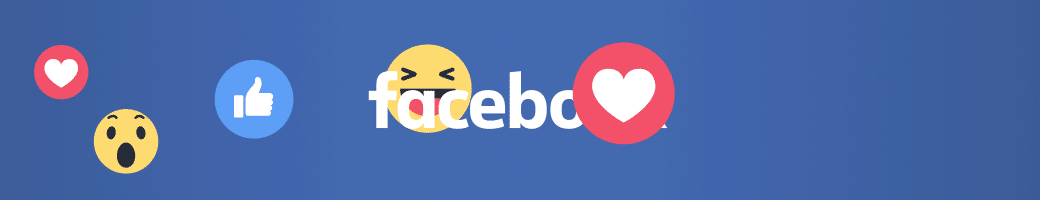

### By: Daniel Popescu


#### 1. Overview

The purpose of this report is to show how frequently these apps request facebook data and if they all do it with the same frequency. 

In [2]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

In order to read our data, we will need to use json in order to open our file titled "your_off_facebook_activity".

In this file we win find all the data neccessary for this project. The json command below opens said file.

In [3]:
with open(r"C:\Users\Daniel\Desktop\EMAT 22110\Facebook data\facebook-davidsilva100046_toshare\ads_and_businesses\your_off-facebook_activity.json") as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

#### 2. The Data

The data we are going to use came from Professor Silva's facebook account which was uploaded to blackboard as a sample to be used for this projects.

In order for this data to be accessed and downloaded from facebook a user has to do a few steps which are listed in the attached screenshot and the source below.

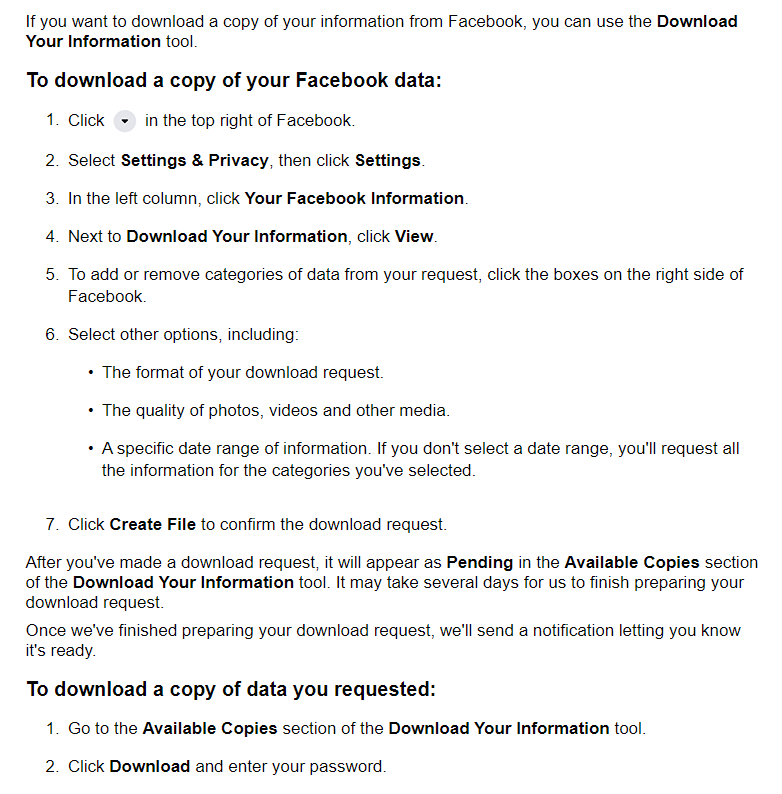

Source:  https://www.facebook.com/help/212802592074644

##### -- Trust factor --

The data is reliable and easy to trust because it comes from a reliable source such as a professor. 

#### HOWEVER #### 

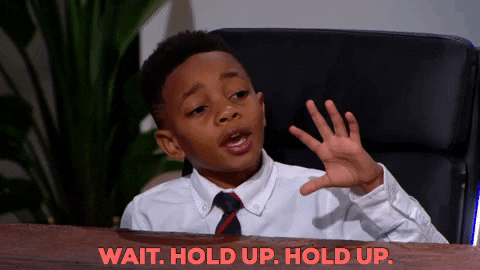


While a professor does provide this data, the data itself comes from facebook. This brings some issues in of itself because there is no way to verify this data is reported accurately at all. For all we know, facebook could be keeping certain aspects they don't want us to see out of the data.

With all of this being taken in consideration, there is no way for us to figure out how accurate our report will be. Our understanding of the data and how it works will be limited by the lack of accuracy confidence. We can only work with what we have and trust the results we get based on what we have.

In [4]:
type(act['off_facebook_activity'])

list

In [5]:
act['off_facebook_activity'][0]

{'name': 'U.S. Bank - Inspired by customers',
 'events': [{'id': 1591992844216198,
   'type': 'ACTIVATE_APP',
   'timestamp': 1594274368},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594239280},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594156238},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594066670},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593919348},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593652182},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593651360},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593273365},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593127728},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593100373},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593095964},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1592933608},
  {'id': 15919

In [6]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [7]:
act['off_facebook_activity'][0]['events'][0]['type']

'ACTIVATE_APP'

#### 3. Data Preparation

Below we are putting the data from our file into a DataFrame in order to easily organize and read it. 

In this table we assign the data to certain columns and we visualize a collection of event types. 

The following code determines the values such as apps and events at the top. It creates that so that we may use them in the following code and put them in a table for easier visualization.

This is necessary in order to be able to create the table. Without this data being determined and without creating these variables, we can't create a table for easier representation. It makes for easier access.

In [8]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

Here we can see the data we determined above be taken and put into a table for that clean visualization.

This takes each piece of data and lists it under the right name such as Event Count which has all the events listen under it.

The first piece of the code takes sets the names of the columns that we would like to have in the table. The lines after the first one sets what kind of information is meant to be assignment to each columns. For example, the column named 'App' will have all the apps in it and so on.

In [31]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

App  Event Count  Activate App  Custom  \
0  U.S. Bank - Inspired by customers           18            18       0   
1                          Egg, Inc.          165           109       0   
2                            AP News          465           133     325   
3             TikTok - Make Your Day          371            99     267   
4                        uoregon.edu            1             0       0   

   Search  View Content  Ad Request  Page Views  
0       0             0           0           0  
1       0             0          35           0  
2       0             0           7           0  
3       5             0           0           0  
4       0             0           0           1

After we have showed our even types in the table above. We can proceed to looking at the distributions of frequencies per event.

First we use scipy to import our stats.

In [32]:
from scipy import stats
import numpy as np

This following code is used to run a CHI-SQUARE test for the entire list. A chi-square test is used to determine wether a sample data matches the population.

Here we use it to run the entire list which consists of 377 records for both "event count" and "Ad request".

In [34]:
obs = np.array([appbyevent['Event Count'][:377], appbyevent['Ad Request'][:377]])
obs

array([[ 18, 165, 465, 371,   1, 226,   6,  10,   2,   1,   1,   1,   1,
         20,  28,  14,   4,   6,   2,   1,   2,   8,   1,  72,   1,   2,
          1,   1,   2,   3,  29,   1,   1,   1,   1,  16,  41,  28,   3,
          2,   2,   2,   1,  41,   2,   1,   1,   1,   1,   2,   4,   1,
          6,   1,   2,   3,   4,   1,   1,   3,   5,   1,   4,   3,   1,
          1,   4,   1,   2,   4,   1,   1,   2,   1,   1,   1,   1,   2,
          3,   1,   1,   1,   1,   2,   2,   4,   1,   5,   2,   1,   4,
          2,   2,   2,  22,   2,   2,   1,   1,   1,   3,   1,   7,   1,
          2,   1,   1,   1,   4,   3,   2,   8,   1,   2,  14,   9,   2,
          1,   1,   2,   2,   5,   1,   1,   4,   1,   6,   6,   1,   1,
          1,   3,   4,   1,   1,   1,   5,   1,   4,   3,   1,   1,   1,
          1,   5,   1,   1,   2,   2,   2,   1,   2,   1,   2,   3,   1,
          3,   2,   3,   1,   2,   1,   2,   3,   2,   4,   2,   2,   1,
          1,   1,   1,   1,   1,   3,   1,   1,   1

In [12]:
stats.chisquare(obs)

Power_divergenceResult(statistic=array([ 18.        ,  84.5       , 444.41525424, 371.        ,
         1.        , 226.        ,   6.        ,  10.        ,
         2.        ,   1.        ,   1.        ,   1.        ,
         1.        ,  20.        ,  28.        ,  14.        ,
         4.        ,   6.        ,   2.        ,   1.        ,
         2.        ,   8.        ,   1.        ,  72.        ,
         1.        ,   2.        ,   1.        ,   1.        ,
         2.        ,   3.        ,  29.        ,   1.        ,
         1.        ,   1.        ,   1.        ,  16.        ,
        41.        ,  28.        ,   3.        ,   2.        ,
         2.        ,   2.        ,   1.        ,  41.        ,
         2.        ,   1.        ,   1.        ,   1.        ,
         1.        ,   2.        ,   4.        ,   1.        ,
         6.        ,   1.        ,   2.        ,   3.        ,
         4.        ,   1.        ,   1.        ,   3.        ,
         5.        ,  

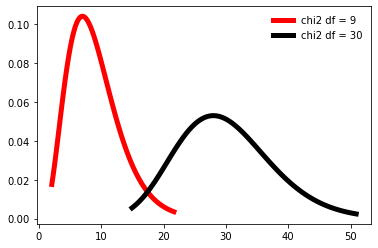

In [36]:
fig, ax1 = plt.subplots(1,1)
df1 = 9
x1 = np.linspace(stats.chi2.ppf(0.01, df1), stats.chi2.ppf(0.99, df1), 100)
ax1.plot(x1, stats.chi2.pdf(x1, df1), 'r-', lw = 5, label = 'chi2 df = 9')
df2 = 30
x2 = np.linspace(stats.chi2.ppf(0.01, df2), stats.chi2.ppf(0.99, df2), 100)
ax1.plot(x2, stats.chi2.pdf(x2, df2), 'k-', lw = 5, label = 'chi2 df = 30')
ax1.legend(loc = 'best', frameon = False)
plt.show()

In the following table we are only going to show the apps that have a few events.

The apps with no events will not be showing in the following table.

In [74]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 10]
sub_apps

App  Event Count  \
0                    U.S. Bank - Inspired by customers           18   
1                                            Egg, Inc.          165   
2                                              AP News          465   
3                               TikTok - Make Your Day          371   
5                                             kent.edu          226   
13                                               Slack           20   
14                                      bonappetit.com           28   
15                                         CondÃ© Nast           14   
23   Microsoft Outlook: Organize Your Email & Calendar           72   
30   Spotify: Listen to new music, podcasts, and songs           29   
35                                           wiley.com           16   
36                                     tandfonline.com           41   
37                                         sagepub.com           28   
43                                      brandwatch.com           41   
94                                          newegg.com           22   
114                                            cnn.com           14   
221                                      mobalytics.gg           14   
261                                    theatlantic.com           12   
283                                            Spotify           14   
377  The NBC App - Stream Live TV and Episodes for ...           18   

     Activate App  Custom  Ad Request  View Content  Page Views  
0              18       0           0             0           0  
1             109       0          35             0           0  
2             133     325           7             0           0  
3              99     267           0             0           0  
5               0       0           0           102         124  
13              1      19           0             0           0  
14              0      16           0             0          12  
15              0      14           0             0           0  
23             72       0           0             0           0  
30             29       0           0             0           0  
35              0      13           0             3           0  
36              0       0           0            24          16  
37              0      11           0            16           1  
43              0       0           0            22          19  
94              0       0           0            12           5  
114             0       0           0             6           8  
221             0       0           0             0          14  
261             0       6           0             5           1  
283             0       0           0            14           0  
377             3      15           0             0           0

From the table above we proceed to single out the app with the most events and the app with the least events.

First, the table below shows the app with the most amount events. We can see that the app with the most amount of events is AP News.

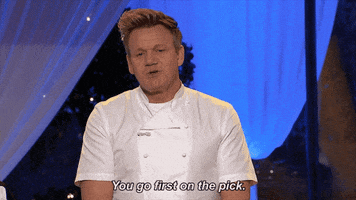

In [75]:
appbyevent.loc[appbyevent['App'] == "AP News"]

App  Event Count  Activate App  Custom  Search  View Content  \
2  AP News          465           133     325       0             0   

   Ad Request  Page Views  
2           7           0

This second table shows the one with the least amount of events which is theatlantic.com

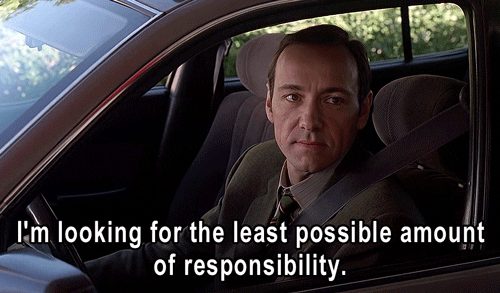

In [76]:
appbyevent.loc[appbyevent['App'] == "theatlantic.com"]

App  Event Count  Activate App  Custom  Search  View Content  \
261  theatlantic.com           12             0       6       0             5   

     Ad Request  Page Views  
261           0           1

In the following coding, we will be creating a new row for the table which will list what type of category our data is under. This will be listed as either an app, website, or unknown if it doesn't know what it is listed under.

In [77]:
sub_apps['App']

0                      U.S. Bank - Inspired by customers
1                                              Egg, Inc.
2                                                AP News
3                                 TikTok - Make Your Day
5                                               kent.edu
13                                                 Slack
14                                        bonappetit.com
15                                           CondÃ© Nast
23     Microsoft Outlook: Organize Your Email & Calendar
30     Spotify: Listen to new music, podcasts, and songs
35                                             wiley.com
36                                       tandfonline.com
37                                           sagepub.com
43                                        brandwatch.com
94                                            newegg.com
114                                              cnn.com
221                                        mobalytics.gg
261                            

In [78]:
cats = ['app', 'app', 'app', 'app', 'site', 'app', 'site', 'unknown', 'app', 'app', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'unknown', 'app']
cats

['app',
 'app',
 'app',
 'app',
 'site',
 'app',
 'site',
 'unknown',
 'app',
 'app',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'unknown',
 'app']

Here we see the same table we had created earlier, but with the new category row. This new category is meant to show what kind of account we have, whether it's an app, a website, or unknown.

In [79]:
sub_apps['category'] = cats
sub_apps

App  Event Count  \
0                    U.S. Bank - Inspired by customers           18   
1                                            Egg, Inc.          165   
2                                              AP News          465   
3                               TikTok - Make Your Day          371   
5                                             kent.edu          226   
13                                               Slack           20   
14                                      bonappetit.com           28   
15                                         CondÃ© Nast           14   
23   Microsoft Outlook: Organize Your Email & Calendar           72   
30   Spotify: Listen to new music, podcasts, and songs           29   
35                                           wiley.com           16   
36                                     tandfonline.com           41   
37                                         sagepub.com           28   
43                                      brandwatch.com           41   
94                                          newegg.com           22   
114                                            cnn.com           14   
221                                      mobalytics.gg           14   
261                                    theatlantic.com           12   
283                                            Spotify           14   
377  The NBC App - Stream Live TV and Episodes for ...           18   

     Activate App  Custom  Ad Request  View Content  Page Views category  
0              18       0           0             0           0      app  
1             109       0          35             0           0      app  
2             133     325           7             0           0      app  
3              99     267           0             0           0      app  
5               0       0           0           102         124     site  
13              1      19           0             0           0      app  
14              0      16           0             0          12     site  
15              0      14           0             0           0  unknown  
23             72       0           0             0           0      app  
30             29       0           0             0           0      app  
35              0      13           0             3           0     site  
36              0       0           0            24          16     site  
37              0      11           0            16           1     site  
43              0       0           0            22          19     site  
94              0       0           0            12           5     site  
114             0       0           0             6           8     site  
221             0       0           0             0          14     site  
261             0       6           0             5           1     site  
283             0       0           0            14           0  unknown  
377             3      15           0             0           0      app

#### 4. Data Visualization

So, this is a lot of data so far which can be a bit confusing and maybe overwhelming even when it is put in tables.

Here, we will be creating some graphs in order to make it easier to visualize the data we have collected in our tables so far.

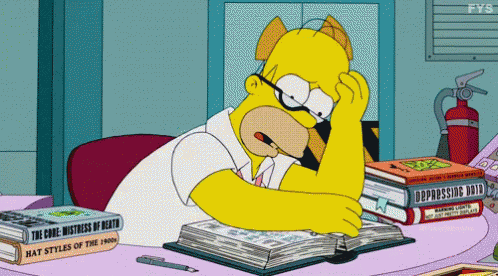

The table below shows the specific apps/websites with their specific amount of events.

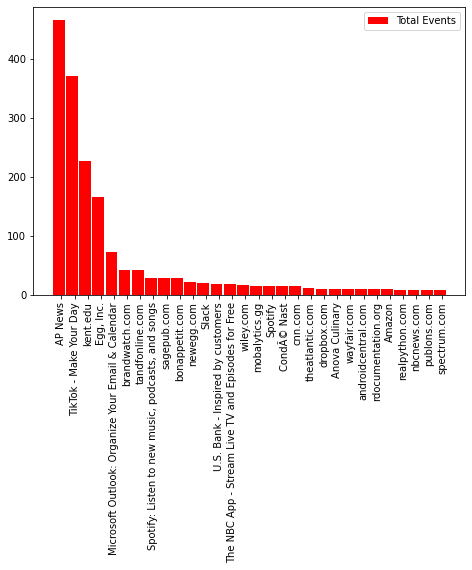

In [31]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:30], color = 'r', width = .90)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events'])
plt.show()

This following table shows a range of event counts for apps and websites. It's exactly the same data as in the previous graph, but more compact and it doesn't list the individual apps/websites.

According to the tabel, more than 8 websites have less than 100 events while less than 2 apps have over 400.

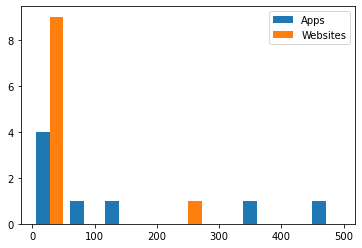

In [121]:
bins = np.linspace(0, 500, 10)
apps = sub_apps['Event Count'].loc[sub_apps['category'] == 'app']
sites = sub_apps['Event Count'].loc[sub_apps['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

The table below shows the amount of ad requests per individual app/website. 

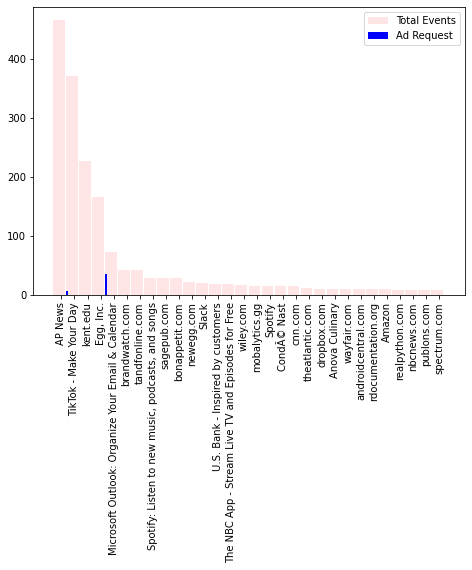

In [99]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(30)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:30], color = 'r', alpha = .1, width = .90)
ax.bar(X+.60, appbyevent['Ad Request'][0:30], color = 'b', width = .15)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:30]), rotation=90)
ax.legend(labels=['Total Events', 'Ad Request'])
plt.show()

The graph below shows the same data as the graph above, but more compact. This graph the amount of apps and websites that have less than 20 Ad Requests and the amount that have over 20.

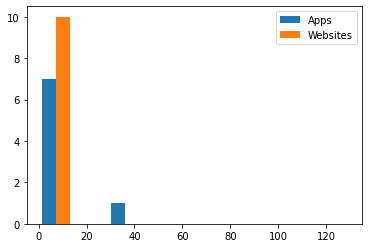

In [108]:
bins = np.linspace(0, 130, 10)
apps = sub_apps['Ad Request'].loc[sub_apps['category'] == 'app']
sites = sub_apps['Ad Request'].loc[sub_apps['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

#### 5. Conclusion

Based on our data analysis and visualisation that was shown above we can tell that there is one account that dominates in regard to the ammount of events and one that is lacking in ammount of events.

The one account that dominates is AP News while the other is CNN.com.

Additionally, based on the graphs meant to visualize this data, we can tell that there isn't much Ad Requesting happening across these palces. The ones with the most Ad Requests are Egg, Inc. at the top followed by TikTok - Make Your Day.

#### 6. Limitations, Alternative Approaches & Next Steps.

A question that has risen from this analysis for me is why there are only 2 websites that have Ad Requests on them since Ad Requests are pretty common across websites in general. Every time you go to a website or an app you see some sort of Ads, but according to these data, you don't see much of it really.

In order to understand this behavior, a thing that can be taken in consideration is how successful these website/apps are and how they create their revenue. Some of them may not need Ads in order to create revenue while others may.

A limitation that arises from this analysis is accuracy confidence since the data comes from Facebook and there is absolutely no way of checking how accurate it really is. For all we know, Facebook could be cutting a lot of things out of the data before it allows us to download it and go through it. The data could be missing significant chucks and we may not know it. Since Facebook controlls it, there is nothing we can do to check how accurate it is.